In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import itertools

## Importing data and initial data processing (synapse weights)

In [2]:
base_dir = os.getcwd()+os.sep

data_str1="_HeteroSynapses.dat"
data_str2="_OverallHS.dat"

file1 = [f for f in os.listdir(base_dir) if f.endswith(data_str1)]
file2 = [f for f in os.listdir(base_dir) if f.endswith(data_str2)]

data1 = pd.read_csv(base_dir + file1[0], delimiter='\t', comment='#', header=0)
data2 = pd.read_csv(base_dir + file2[0], delimiter='\t', comment='#', header=0)

data1=data1.drop(columns=data1.columns[-1])
data2=data2.drop(columns=data2.columns[-1])
#data1=data1.iloc[:,2:-1]
#data1=data1.applymap(literal_eval)
#data1["time"]=data2["t"]



#Implement .groupby() factors to discriminate by population, neuron and synapse. The columns can be whatever

In [3]:
times = data1.iloc[::,:1]
#syn_weight_data = data1.iloc[::,1:].applymap(lambda x: x.split(',')[1]).astype('float32')
#alpha_resources_data = data1.iloc[::,1:].applymap(lambda x: x.replace("}", "")).applymap(lambda x: x.split(',')[2]).astype('float32')

In [4]:
pop_column=list()
neuron_column=list()
synapse_column=list()
complete_id=list()
big_time=list()


for i in data1.columns[1:,]:
    complete_id.append(i)
    pop, neuron, synapse=[f for f in i.split("_")[1:]]
    pop_column.append(pop)
    neuron_column.append(neuron)
    synapse_column.append(synapse)
data_points_total=(len(set(pop_column)))*(len(set(neuron_column)))*(len(set(synapse_column)))

pop_column.extend(list(pop_column*(len(data1["t"])-1)))
neuron_column.extend(list(neuron_column*(len(data1["t"])-1)))
synapse_column.extend(list(synapse_column*(len(data1["t"])-1)))
complete_id.extend(list(complete_id*(len(data1["t"])-1)))

temp_df=data1.iloc[::,1:].applymap(lambda x: x.replace("{", "")).applymap(lambda x: x.replace("}", ""))
syn_weight_data = temp_df.applymap(lambda x: x.split(',')[1]).astype('float32').stack()
alpha_resources_data = temp_df.applymap(lambda x: x.split(',')[2]).astype('float32').stack()
branch=temp_df.applymap(lambda x: x.split(',')[0]).astype('float32').stack()
#last_spiketime=data1.iloc[::,1:].applymap(lambda x: x.replace("{", "")).applymap(lambda x: x.replace("}", "")).applymap(lambda x: x.split(',')[3]).astype('float32').stack()

big_time = [itertools.repeat(elem, data_points_total) for elem in times.values.tolist()]
big_time = list(itertools.chain.from_iterable(big_time))
flat_big_time = [float(item) for sublist in big_time for item in sublist]

fdata=pd.DataFrame({'time':flat_big_time,'complete_id':complete_id, 'pop':pop_column, 'neuron':neuron_column, 'synapse':synapse_column, 'weights':syn_weight_data, 'alpha':alpha_resources_data, 'branch':branch})

## Plotting synaptic weights

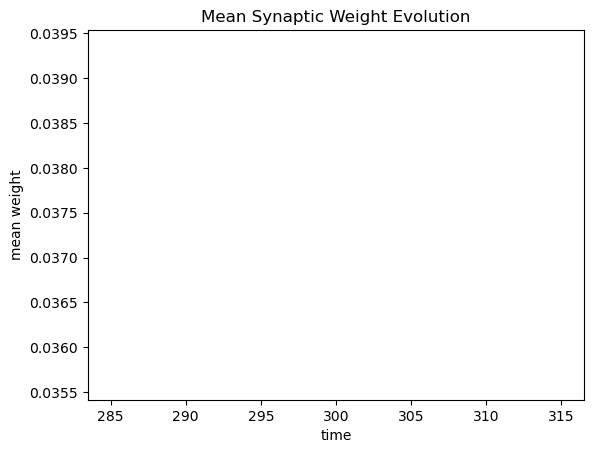

In [5]:
fdata['timefactor']=fdata['time'].astype("string")
mean_wts = fdata.groupby(['time'])['weights'].mean()
plt.plot(times, mean_wts)
plt.title("Mean Synaptic Weight Evolution")
plt.xlabel("time")
plt.ylabel("mean weight")
plt.show()

matrix=fdata.pivot(index='time', columns='complete_id', values='weights')

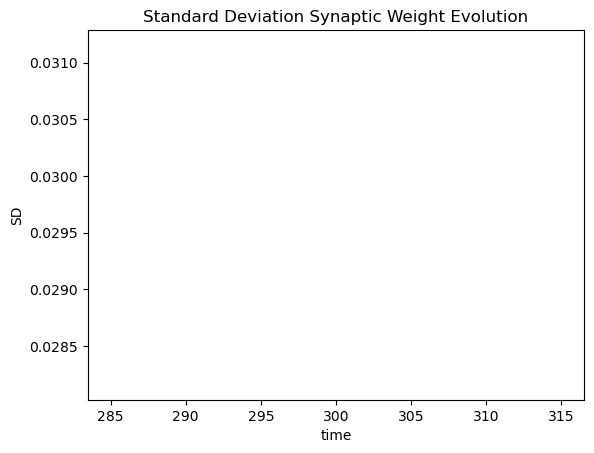

In [6]:
fdata['timefactor']=fdata['time'].astype("string")
std_wts = fdata.groupby(['time'])['weights'].std()
plt.plot(times, std_wts)
plt.title("Standard Deviation Synaptic Weight Evolution")
plt.xlabel("time")
plt.ylabel("SD")
plt.show()

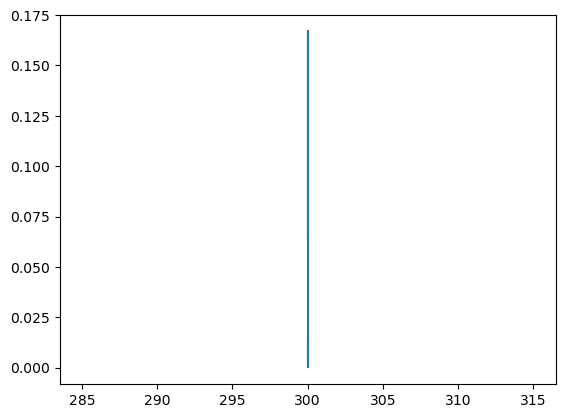

In [7]:
plt.plot(fdata['time'], fdata['weights'], label=fdata['complete_id'])
plt.show()

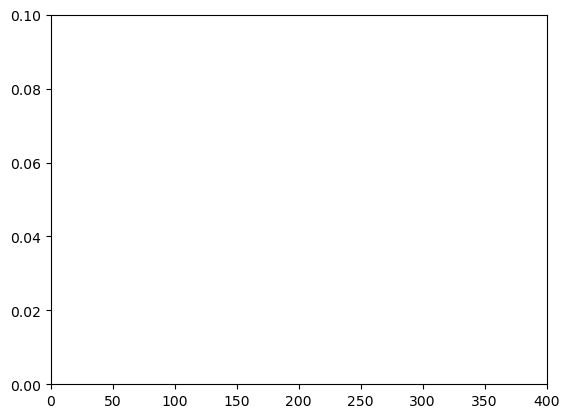

In [8]:
plt.plot(matrix.index, matrix.values)
plt.axis([0, 400, 0, 0.1])
plt.show()

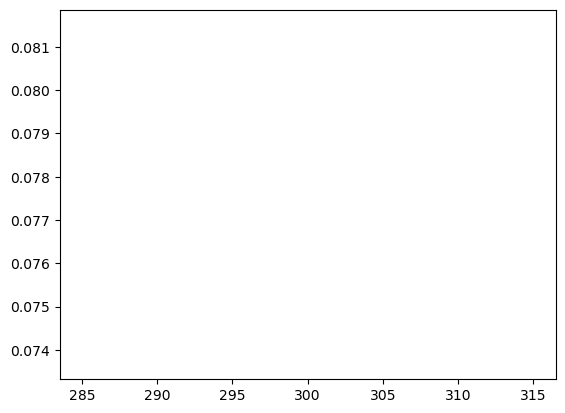

In [9]:
single_neuron=fdata[fdata['synapse']=='10']
plt.plot(single_neuron['time'], single_neuron['weights'])
plt.show()

## Synaptic weight histograms

In [18]:
timestep1=299.9999
timestep2=390.0019

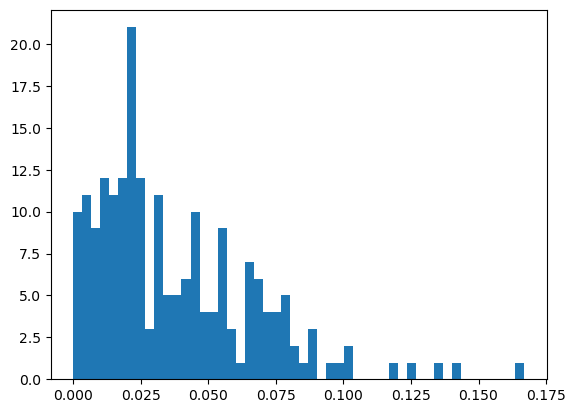

In [19]:
single_timestep=fdata[fdata['time']==timestep1]
plt.hist(single_timestep['weights'], bins=50)
plt.show()

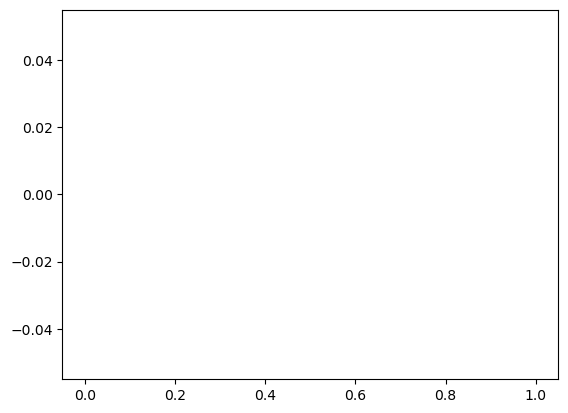

In [20]:
single_timestep=fdata[fdata['time']==timestep2]
plt.hist(single_timestep['weights'], bins=50)
plt.show()

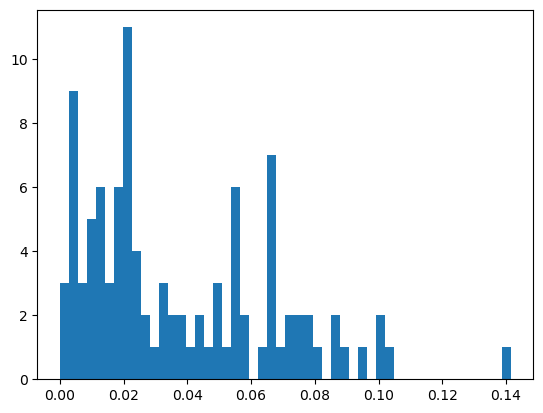

In [21]:
single_timestep=fdata[fdata['time']==timestep1]
single_branch1=single_timestep[single_timestep['branch']==0]
plt.hist(single_branch1['weights'], bins=50)
plt.show()

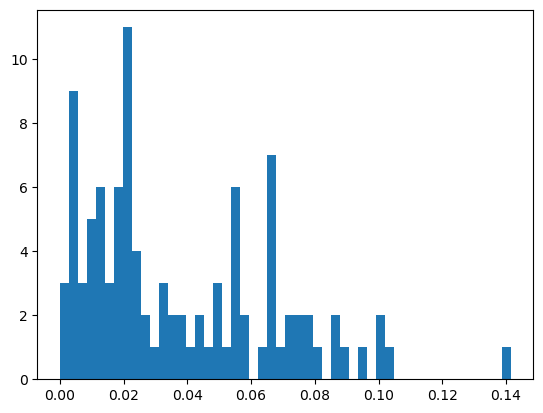

In [22]:
single_timestep=fdata[fdata['time']==timestep1]
single_branch2=single_timestep[single_timestep['branch']==1]
plt.hist(single_branch1['weights'], bins=50)
plt.show()

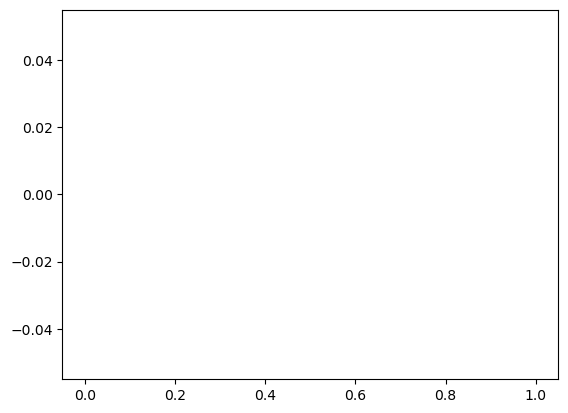

In [15]:
single_timestep=fdata[fdata['time']==timestep2]
single_branch1=single_timestep[single_timestep['branch']==0]
plt.hist(single_timestep['weights'], bins=50)
plt.show()

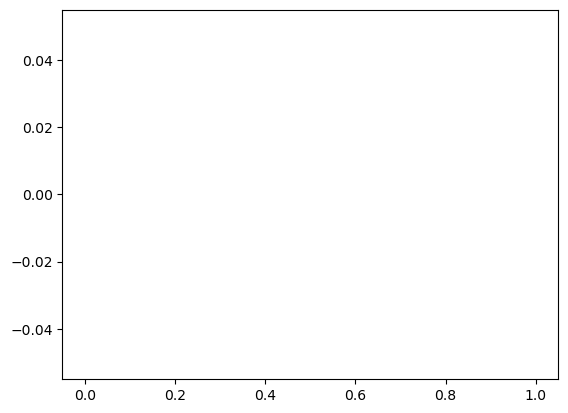

In [16]:
single_timestep=fdata[fdata['time']==timestep2]
single_branch2=single_timestep[single_timestep['branch']==1]
plt.hist(single_branch1['weights'], bins=50)
plt.show()

In [17]:
single_timestep=fdata[fdata['time']==timestep1]
single_branch=single_branch2=single_timestep[single_timestep['branch']==1]
width=10
kernel=np.ones(width)*(1/width)
plt.bar(single_branch['synapse'],np.convolve(single_branch['weights'].to_numpy(), kernel, mode='same'))

ValueError: v cannot be empty

## Spike trains (data import)

In [ ]:
base_dir = os.getcwd()+os.sep

data_str1="_Currents.dat"
data_str2="_Potential.dat"

file1 = [f for f in os.listdir(base_dir) if f.endswith(data_str1)]
file2 = [f for f in os.listdir(base_dir) if f.endswith(data_str2)]

data1 = pd.read_csv(base_dir + file1[0], delimiter='\t', comment='#', header=0)
data2 = pd.read_csv(base_dir + file2[0], delimiter='\t', comment='#', header=0)

data1=data1.drop(columns=data1.columns[-1])
data2=data2.drop(columns=data2.columns[-1])

## Spike trains (plotting)

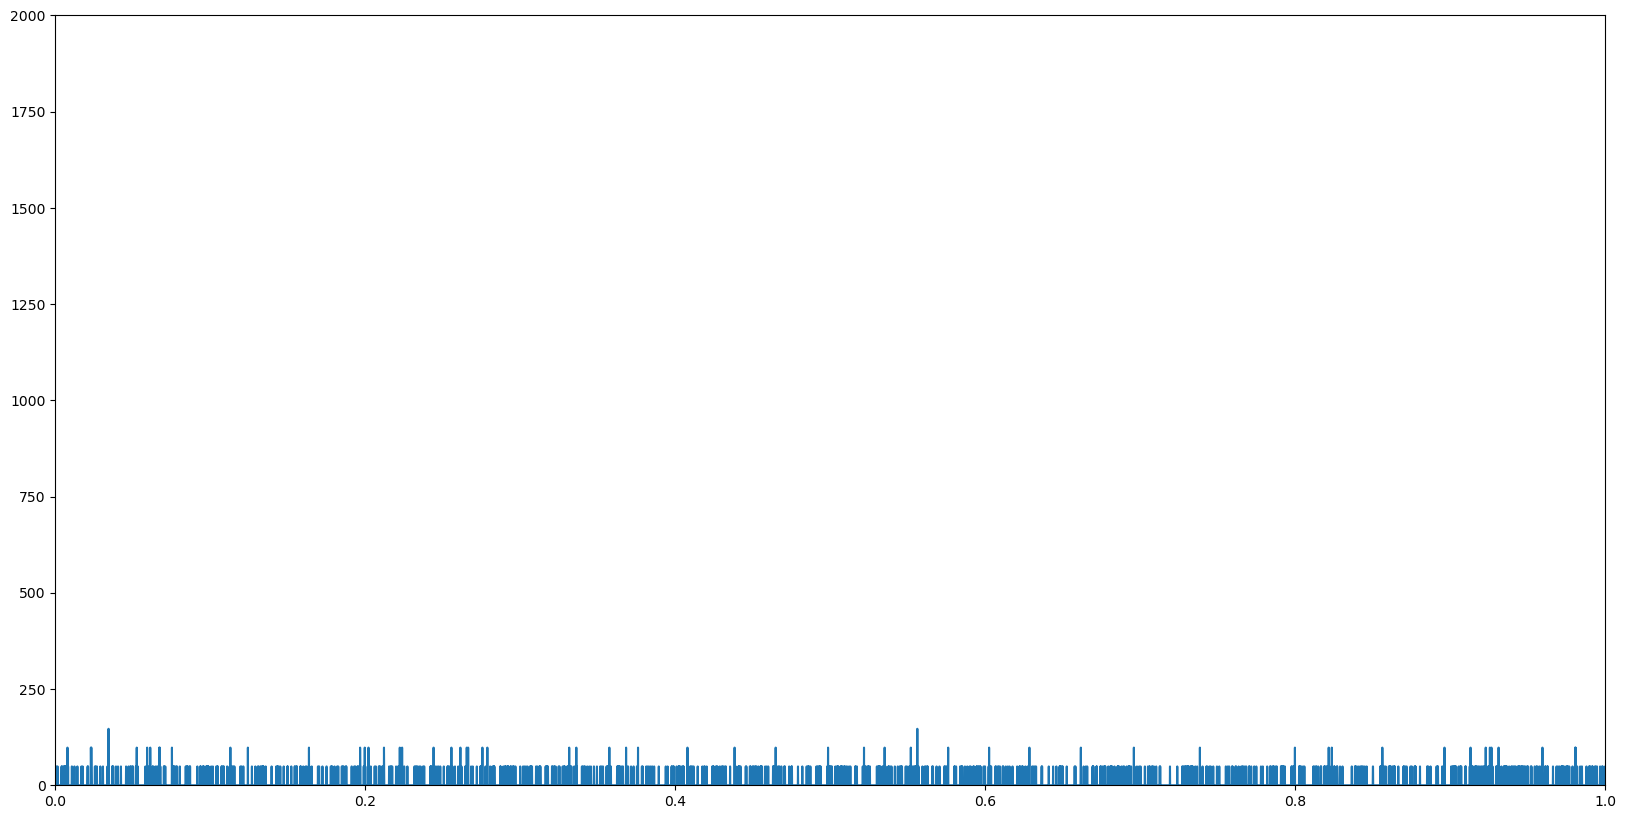

In [ ]:
plt.figure(figsize=(20, 10))
plt.axis([0, 1, 0, 2000])
plt.plot(data1.iloc[::,0],data1.iloc[::,2], scalex=(0,10))

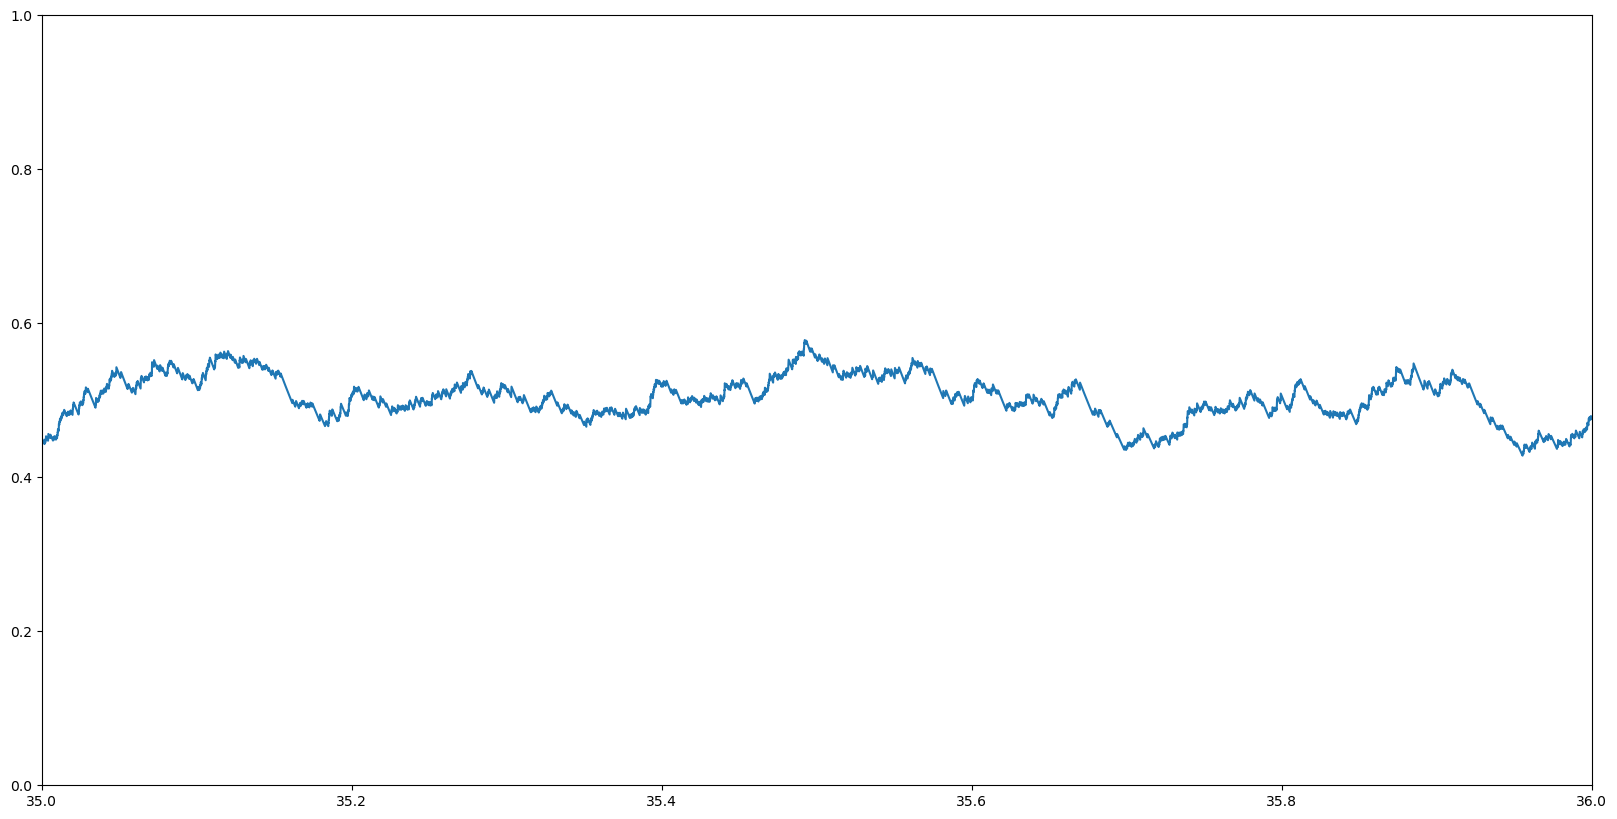

In [ ]:
plt.figure(figsize=(20, 10))
plt.axis([35, 36, 0, 1])
plt.plot(data2.iloc[::,0],data2.iloc[::,2], scalex=(0,10))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

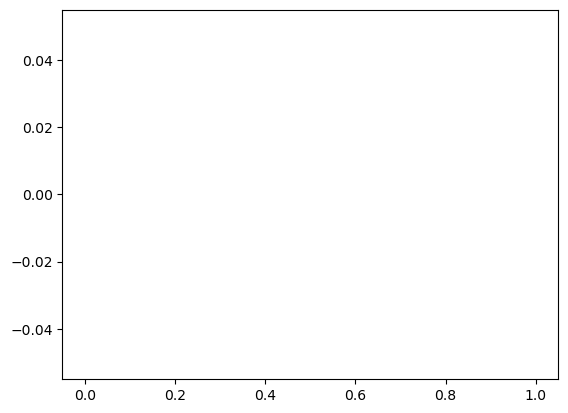

In [ ]:
zeroV=data2[data2['V_1_0']==0.0]['t']
spiketimes=list()
previous_t=0.0
dt=0.00015
for i in zeroV:
    if (i-previous_t)>dt:
        spiketimes.append(i)
    previous_t=i
ISIntervals=list()
for i in range(len(spiketimes)-1):
    ISIntervals.append(round(spiketimes[i+1]-spiketimes[i], 4))
plt.hist(ISIntervals, bins=50)